<a href="https://colab.research.google.com/github/HS1707/-Implementation-of-Logistic-Regression-Using-Gradient-Descent/blob/main/Android_Malware_Detecton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [332]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
#from sklearn.svm import SVC
#from sklearn.model_selection import KFold
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [344]:
data=pd.read_csv('android.csv')

In [334]:
data

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles,malware
0,ping,0.000,5.000,0.000,10.0,1.030,164.64,146.36,0.61,2.72,58266.0,26.43,85861,111.667,19973.0,2060667,0
1,curl,0.014,5.000,0.601,14.0,0.072,317.32,255.84,18.07,0.18,135878.0,7.95,75561,86.263,13152.0,2119754,0
2,top,0.005,0.219,0.060,6.0,0.071,247.85,266.19,11.33,0.24,104448.0,3.49,54497,106.584,4657.0,1781822,0
3,unzip,0.001,0.717,0.000,16.0,0.012,2346.59,2664.54,79.12,0.34,93458.0,14.89,97912,73.217,7863.0,2349887,0
4,system-monitor,0.182,11.000,0.181,4.0,1.527,60.68,48.13,0.88,0.69,289124.0,2.14,87246,23.621,19071.0,2140178,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,41089,0.337,1.000,0.000,49.0,1.054,149.29,125.43,1.00,1.50,100617.0,11.06,95818,123.367,15136.0,2299597,1
66,41375,0.038,0.204,0.020,18.0,1.496,61.99,47.42,1.04,0.60,321071.0,3.94,95535,31.285,13880.0,2356069,1
67,42485,0.001,0.781,0.000,40.0,0.314,381.38,314.04,3.05,1.25,93834.0,13.17,94456,119.862,12337.0,2266964,1
68,43552,0.630,0.000,0.000,44.0,0.165,803.32,664.66,6.28,1.28,102347.0,12.31,93360,108.567,13169.0,2240652,1


In [312]:
data.shape

(70, 17)

In [336]:
print("Total Features : ",len(data.columns)-1)

Total Features :  16


In [313]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles,malware
0,zipinfo,0.257,2.000,0.000,90.0,1.171,134.10,102.93,1.40,0.96,167658.0,5.09,95122,129.192,17367.0,2282918,0
1,pip,0.454,0.269,0.018,15.0,1.664,40.64,24.32,1.63,0.25,558519.0,1.93,94788,35.549,11036.0,2296454,0
2,python,0.005,0.279,0.105,30.0,0.038,493.37,666.52,24.81,0.27,138305.0,10.24,82026,77.701,13754.0,2352067,0
3,find,0.406,0.956,0.056,11.0,0.032,306.46,368.78,11.98,0.31,53105.0,0.53,27445,106.372,1582.0,971729,0
4,curl,0.014,5.000,0.601,14.0,0.072,317.32,255.84,18.07,0.18,135878.0,7.95,75561,86.263,13152.0,2119754,0


<Axes: xlabel='malware', ylabel='count'>

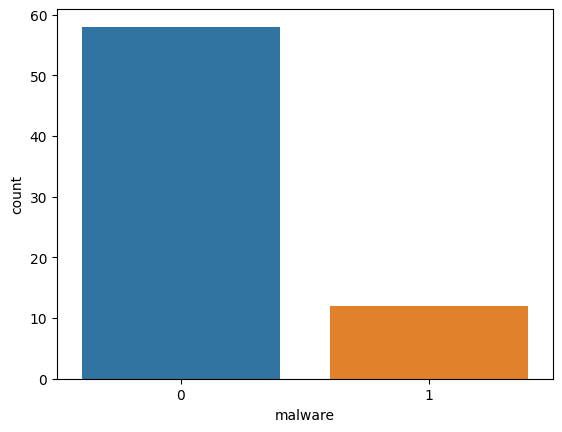

In [314]:
import seaborn as sns
sns.countplot(x='malware',data=data)

In [315]:
target_count = data.malware.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])

Class 0: 58
Class 1: 12


In [316]:
count_class_0, count_class_1 = data.malware.value_counts()

In [317]:
df_class_0 = data[data['malware'] == 0]
df_class_1 = data[data['malware'] == 1]

In [318]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
df_test_over.shape

(116, 17)

<Axes: xlabel='malware', ylabel='count'>

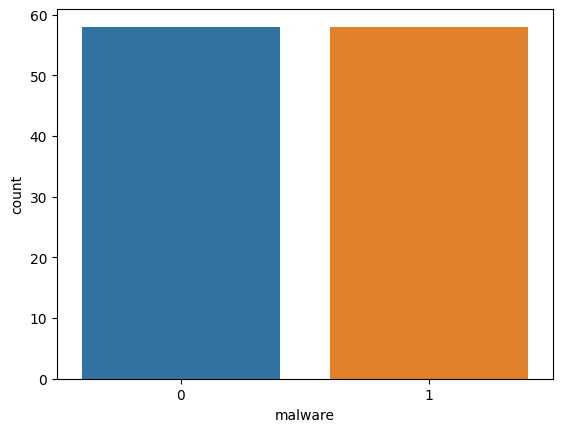

In [331]:
sns.countplot(x='malware',data=df_test_over)

In [155]:
X=df_test_over.iloc[:,df_test_over.columns !='malware']
Y=df_test_over.iloc[:,df_test_over.columns =="malware"]

In [156]:
X.head()

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
1,character-map,0.107,1.000,0.099,4.0,1.211,53.00,42.81,0.93,0.57,264061.0,2.33,81726,29.542,14266.0,2001858
2,gnome-software,0.883,1.000,0.124,15.0,0.003,1852.55,2496.88,85.32,0.29,35031.0,0.57,24367,8.980,3601.0,877674
3,ls,0.579,19.000,0.000,26.0,0.297,359.57,359.34,4.99,0.72,153480.0,7.36,87639,95.313,12128.0,2103360
4,top,0.005,0.219,0.060,6.0,0.071,247.85,266.19,11.33,0.24,104448.0,3.49,54497,106.584,4657.0,1781822
5,thunderbird,0.249,2.000,0.120,8.0,0.974,57.66,47.53,0.75,0.77,171234.0,3.89,70828,32.050,13142.0,1785454


In [157]:
Y.head()

,malware
1,0
2,0
3,0
4,0
5,0


In [158]:
from sklearn.utils import shuffle
X, Y=shuffle(X, Y)


In [159]:
X.head()

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
50,41089,0.337,1.0,0.000,49.0,1.054,149.29,125.43,1.00,1.50,100617.0,11.06,95818,123.367,15136.0,2299597
69,yelp,0.153,2.0,0.203,16.0,1.121,53.80,41.35,1.00,0.54,250103.0,2.59,64393,28.461,15481.0,1704493
50,41089,0.337,1.0,0.000,49.0,1.054,149.29,125.43,1.00,1.50,100617.0,11.06,95818,123.367,15136.0,2299597
42,43552,0.630,0.0,0.000,44.0,0.165,803.32,664.66,6.28,1.28,102347.0,12.31,93360,108.567,13169.0,2240652
63,calculator,0.062,2.0,0.189,5.0,1.100,48.84,35.02,0.96,0.51,231173.0,2.78,77247,42.083,13365.0,2000843


In [160]:
X=X.drop(columns='name')
X.head()

,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
50,0.337,1.0,0.000,49.0,1.054,149.29,125.43,1.00,1.50,100617.0,11.06,95818,123.367,15136.0,2299597
69,0.153,2.0,0.203,16.0,1.121,53.80,41.35,1.00,0.54,250103.0,2.59,64393,28.461,15481.0,1704493
50,0.337,1.0,0.000,49.0,1.054,149.29,125.43,1.00,1.50,100617.0,11.06,95818,123.367,15136.0,2299597
42,0.630,0.0,0.000,44.0,0.165,803.32,664.66,6.28,1.28,102347.0,12.31,93360,108.567,13169.0,2240652
63,0.062,2.0,0.189,5.0,1.100,48.84,35.02,0.96,0.51,231173.0,2.78,77247,42.083,13365.0,2000843


In [161]:
Y.head()

,malware
50,1
69,0
50,1
42,1
63,0


In [163]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [164]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores.nlargest(10,'Score')

,Specs,Score
14,ref-cycles,827538.826753
9,branches,324242.783882
6,stalled-cycles-backend-percent,129619.694183
11,bus-cycle,79047.109480
5,stalled-cycles-frontend-percent,43110.684270
13,cache-references,6396.783840
7,Instructions-per-cycle,2798.040915
12,cache-misses-percent,321.086359
3,page-faults,160.667032
10,branch-misses-percent,78.862193


[0.05208525 0.05224818 0.03654998 0.0574122  0.0585874  0.02852781
 0.03226522 0.03918617 0.15387016 0.08817084 0.10583488 0.09700937
 0.08039538 0.03528935 0.08256782]


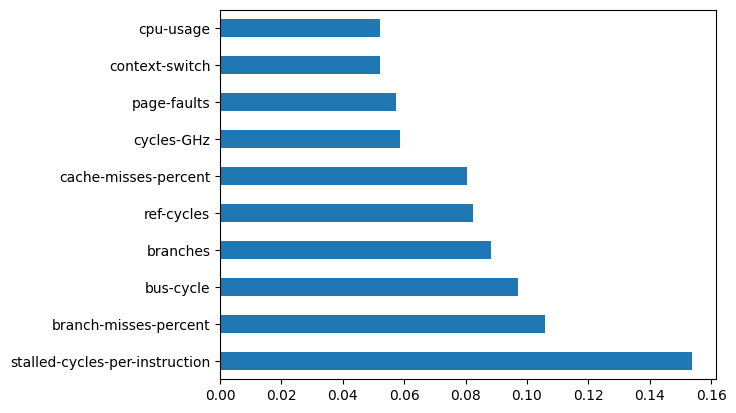

In [165]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #used inbuilt class feature_importances of tree based classifiers
#plotted graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [294]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=35)

In [295]:
X_train.shape

(92, 15)

In [296]:
X_train.head()

,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
35,0.655,2.000,0.682,35.0,0.312,437.40,360.90,3.01,1.45,92388.0,12.67,93516,109.877,15086.0,2244389
30,0.050,0.574,0.185,26.0,0.423,30.83,19.64,0.71,0.43,161921.0,1.11,42612,21.307,3492.0,1304750
50,0.337,1.000,0.000,49.0,1.054,149.29,125.43,1.00,1.50,100617.0,11.06,95818,123.367,15136.0,2299597
64,0.001,0.967,0.242,31.0,0.995,125.05,96.35,1.75,0.71,158966.0,7.81,98087,124.647,12089.0,2354092
50,0.337,1.000,0.000,49.0,1.054,149.29,125.43,1.00,1.50,100617.0,11.06,95818,123.367,15136.0,2299597


In [297]:
y_train.head()

,malware
35,1
30,0
50,1
64,0
50,1


In [470]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [471]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [472]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=35)
rf_classifier.fit(X_train, y_train)
# Predict on the test set
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 95.83%


In [473]:
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.91      1.00      0.95        10

    accuracy                           0.96        24
   macro avg       0.95      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24



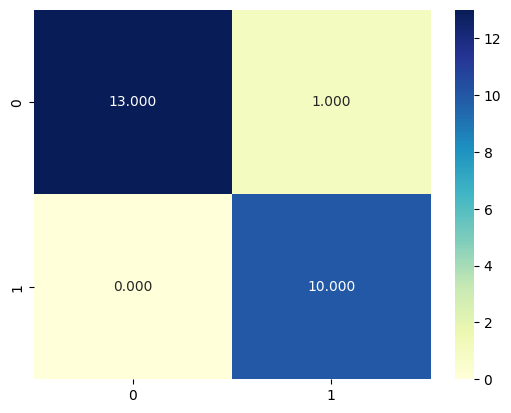

In [474]:
cnf_matrix = confusion_matrix(y_test,y_pred)
labels = [0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()

In [475]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd


In [476]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=35)
rf_classifier.fit(X_train, y_train)
y_probs = rf_classifier.predict_proba(X_test)[:, 1]

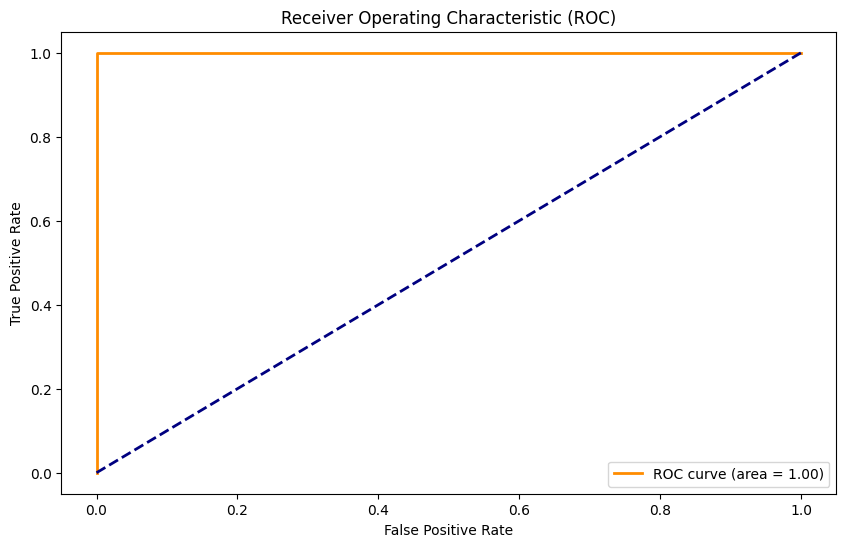

In [477]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [478]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [479]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=35)
logistic_reg_model = LogisticRegression()
# Train the model
logistic_reg_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_reg_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')


Accuracy: 79.17%


In [480]:
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        14
           1       0.67      1.00      0.80        10

    accuracy                           0.79        24
   macro avg       0.83      0.82      0.79        24
weighted avg       0.86      0.79      0.79        24



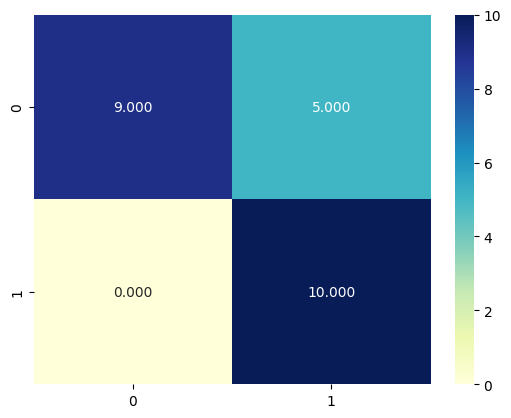

In [481]:
cnf_matrix = confusion_matrix(y_test,y_pred)
labels = [0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()

In [482]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [483]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=35)
# Initialize the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can change the value of 'n_neighbors' as needed

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')


Accuracy: 83.33%


In [484]:
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.80      0.80      0.80        10

    accuracy                           0.83        24
   macro avg       0.83      0.83      0.83        24
weighted avg       0.83      0.83      0.83        24



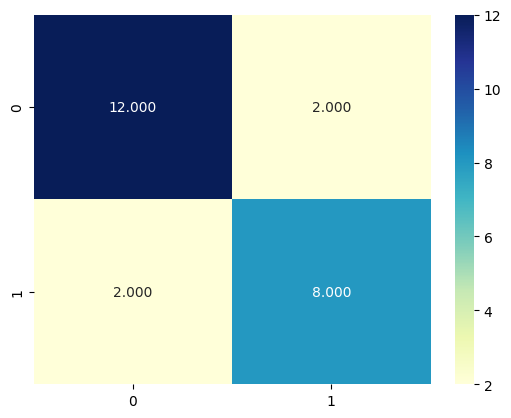

In [485]:
cnf_matrix = confusion_matrix(y_test,y_pred)
labels = [0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()

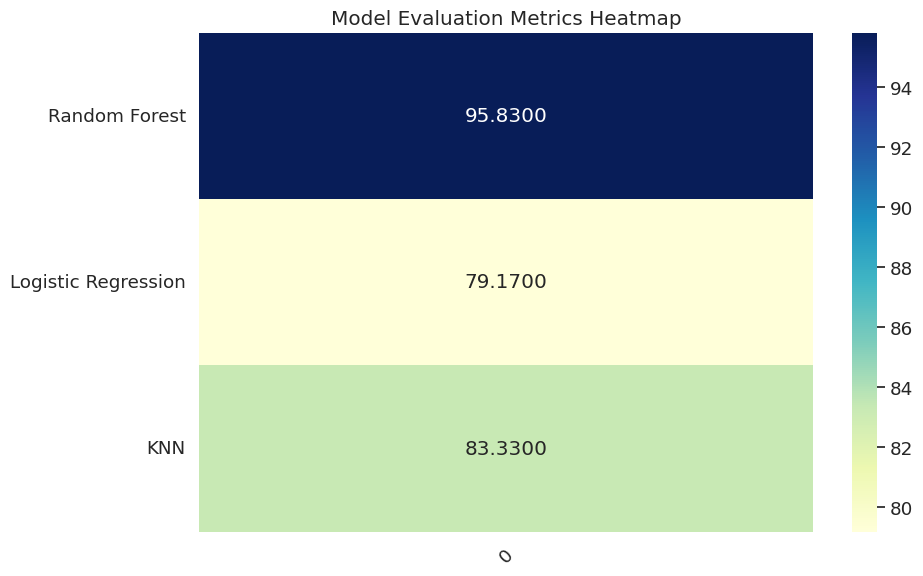

In [487]:
import matplotlib.pyplot as plt
import seaborn as sns
models= ['Random Forest', 'Logistic Regression', 'KNN']
accuracy_scores = [95.83, 79.17, 83.33]
df = pd.DataFrame(accuracy_scores, index=models)
#heatmap
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)
sns.heatmap(df, annot=True, cmap='YlGnBu', fmt='.4f')
plt.title("Model Evaluation Metrics Heatmap")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()